<a href="https://colab.research.google.com/github/pvpogorelova/metrics_25_26/blob/main/sem_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Семинар 13: спецификация модели, тесты на выбор функциональной формы**

In [66]:
import numpy as np
import pandas as pd # чтение файлов
import seaborn as sns # построение графиков
import statsmodels.api as sm # тесты
import statsmodels.formula.api as smf
import statsmodels
import pandas as pd
import statsmodels.stats.outliers_influence as oi
import scipy.stats
import math
from scipy.stats import chi2

In [67]:
# Импортируем данные о квартирах в Москве
d = pd.read_excel('dataflats.xlsx')
d

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,1,81.0,58,40,6.0,12.5,7,1,1,1
1,2,75.0,44,28,6.0,13.5,7,1,0,1
2,3,128.0,70,42,6.0,14.5,3,1,1,1
3,4,95.0,61,37,6.0,13.5,7,1,0,1
4,5,330.0,104,60,11.0,10.5,7,0,1,1
...,...,...,...,...,...,...,...,...,...,...
2035,2036,110.0,77,45,10.0,12.0,5,0,0,1
2036,2037,95.0,60,43,6.0,9.0,5,0,0,1
2037,2038,95.0,60,46,5.0,10.5,5,1,0,1
2038,2039,129.0,76,48,10.0,12.5,5,0,0,1


In [68]:
# Удалим строки, в которых есть пропуск хотя бы для одного столбца
d.dropna(inplace=True)
# Добавим в набор данных новую переменную price_sq (стоимость 1 кв м квартиры в Москве)
d['price_sq'] = d['price']/d['totsp']
d

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,price_sq
0,1,81.0,58,40,6.0,12.5,7,1,1,1,1.396552
1,2,75.0,44,28,6.0,13.5,7,1,0,1,1.704545
2,3,128.0,70,42,6.0,14.5,3,1,1,1,1.828571
3,4,95.0,61,37,6.0,13.5,7,1,0,1,1.557377
4,5,330.0,104,60,11.0,10.5,7,0,1,1,3.173077
...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110.0,77,45,10.0,12.0,5,0,0,1,1.428571
2036,2037,95.0,60,43,6.0,9.0,5,0,0,1,1.583333
2037,2038,95.0,60,46,5.0,10.5,5,1,0,1,1.583333
2038,2039,129.0,76,48,10.0,12.5,5,0,0,1,1.697368


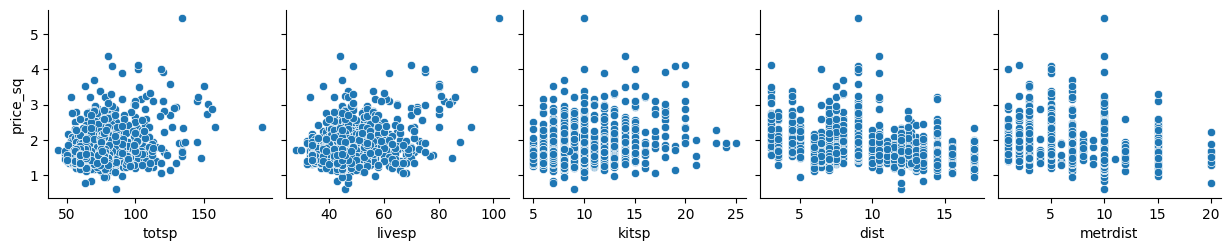

In [69]:
# Построим графики зависимостей стоимости 1 кв м квартиры от различных факторов
sns.pairplot(d, x_vars = ["totsp", "livesp", "kitsp", "dist", "metrdist"], y_vars = ["price_sq"])

In [70]:
# Оценим начальную модель регрессии для стоимости 1 кв.м.
model_0 = smf.ols('price_sq ~ totsp + livesp + kitsp + dist + metrdist', data = d).fit()
print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     188.2
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          5.61e-165
Time:                        19:19:35   Log-Likelihood:                -663.01
No. Observations:                2038   AIC:                             1338.
Df Residuals:                    2032   BIC:                             1372.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6694      0.058     28.765      0.0

In [71]:
# Сохраним прогнозные значения
d['price_sq_hat'] = model_0.predict()
# и остатки модели
d['resid'] = model_0.resid
d

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,price_sq,price_sq_hat,resid
0,1,81.0,58,40,6.0,12.5,7,1,1,1,1.396552,1.548475,-0.151923
1,2,75.0,44,28,6.0,13.5,7,1,0,1,1.704545,1.374219,0.330327
2,3,128.0,70,42,6.0,14.5,3,1,1,1,1.828571,1.510005,0.318567
3,4,95.0,61,37,6.0,13.5,7,1,0,1,1.557377,1.447796,0.109581
4,5,330.0,104,60,11.0,10.5,7,0,1,1,3.173077,1.911328,1.261749
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110.0,77,45,10.0,12.0,5,0,0,1,1.428571,1.720971,-0.292400
2036,2037,95.0,60,43,6.0,9.0,5,0,0,1,1.583333,1.776390,-0.193056
2037,2038,95.0,60,46,5.0,10.5,5,1,0,1,1.583333,1.725855,-0.142522
2038,2039,129.0,76,48,10.0,12.5,5,0,0,1,1.697368,1.746840,-0.049472


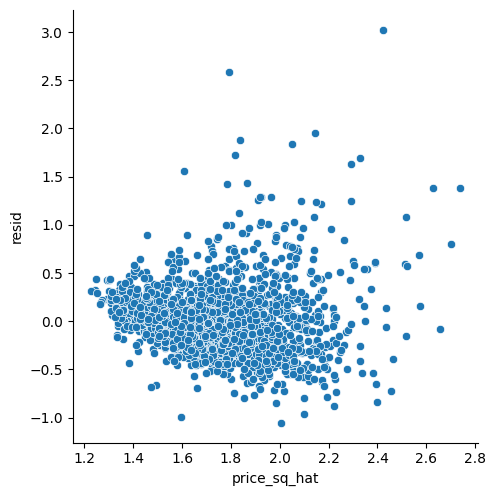

In [72]:
# Построим график зависимости остатков модели от прогнозных значений
sns.pairplot(d, x_vars=['price_sq_hat'], y_vars=["resid"], height = 5)

По приведенному выше графику можно проанализировать наличие двух проблем:


*   неверная спецификация модели (средний уровень остатков зависит от прогнозных
значений, разброс остатков также может зависеть
от прогнозов, хотя это не обязательно);
*   гетероскедастичность (разброс остатков зависит от
прогнозных значений, но средний уровень остатков
во всех частях графика примерно равен нулю).



**Тест Рамсея для модели регрессии (RESET тест)**

$H_0$: нет пропущенных переменных

$H_1$: есть пропущенные переменные

In [73]:
reset = oi.reset_ramsey(model_0, degree = 2)

print(f"F-статистика: {reset.fvalue:.4f}")
print(f"p-value: {reset.pvalue:.4f}")

F-статистика: 91.8500
p-value: 0.0000


Так как $p-value$ в тесте Рамеся равен 0, гипотеза H1 не отвергается, то есть в модели есть пропущенные переменные. Попробуем включить степени некоторых переменных, выдвигая содержательные гипотезы.

К примеру,

*   предельная цена за 1 кв м может уменьшаться с ростом площади (большие квартиры дешевле за 1 кв м);
*   влияние расстояния до центра может быть нелинейным.



In [100]:
# Добавим в исходную модель квадрат общей площади и квадрат расстояния до центра
model_1 = smf.ols('price_sq ~ totsp + I(totsp**2) + livesp + kitsp + dist + I(dist**2)+ metrdist', data = d).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     140.3
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          7.04e-169
Time:                        20:00:48   Log-Likelihood:                -648.66
No. Observations:                2038   AIC:                             1313.
Df Residuals:                    2030   BIC:                             1358.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2275      0.127     17.580

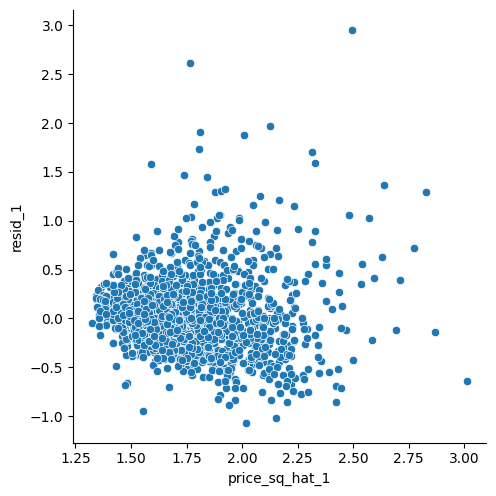

In [101]:
# Сохраним прогнозные значения
d['price_sq_hat_1'] = model_1.predict()
# и остатки модели
d['resid_1'] = model_1.resid
# Построим график зависимости остатков модели от прогнозных значений
sns.pairplot(d, x_vars=['price_sq_hat_1'], y_vars=["resid_1"], height = 5)

Включение квадратов переменных totsp и dist улучшило результаты, так как теперь на графике "остатки-прогнозы" в меньшей степени выражено наличие свзяи между ними. Стоит отметить, что несмотря на то, что визуально среднее значение колеблется вокруг нуля, все же присутствует зависимость разброса остатков от прогнозных значений. Это может свидетельствовать в пользу наличия гетероскедастичности в данных. Поэтому далее мы переоценим эут же спецификацию модели с помощью МНК, но будем использовать робастные стандартные ошибки для получения более надежных выводов.

In [103]:
# Способ корректировки гетероскедастичности - использование робастных оценок в форме Уайта.
model_robust = smf.ols('price_sq ~ totsp + I(totsp**2) + livesp + kitsp + dist + I(dist**2)+ metrdist', data = d).fit(cov_type='HC3')
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     86.87
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          8.16e-111
Time:                        20:01:20   Log-Likelihood:                -648.66
No. Observations:                2038   AIC:                             1313.
Df Residuals:                    2030   BIC:                             1358.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2275      0.174     12.774

Заметим, что после переоценивания модели с робастными стандартными ошибками существенно выросло значение t-статистики при проверке гпиотезы о незначимости квадрата общей площади (totsp) в модели регрессии. Но на 5% уровне коэффициент при этой переменной все еще остается значимым.

**Проверка нормальности остатков модели**

Тестирование нормальности остатков модели с помощью теста Харке-Бера.

$H_0$: остатки имеют нормальное распределение

$H_1$: распределение остатков отлично от нормального


In [98]:
from scipy import stats
jb_test = stats.jarque_bera(model_1.resid)
# Выводим результаты
print(f"JB статистика: {jb_test.statistic}")
print(f"p-value: {jb_test.pvalue}")

JB статистика: 7178.222843538911
p-value: 0.0


Так как p-value < 0.05, то гипотеза H1 не отвергается на любом разумном уровне значимости, то есть остатки линейной модели нельзя считать нормальными.
На самом деле, это стандратная ситуация в моделях для цен. Заметим, что у нас достаточно большая выборка (>2000) наблюдений и мы можем использовать ЦПТ.

**J-тест для невложенных моделей**

In [ ]:
from statsmodels.stats.diagnostic import compare_j

model_1 = smf.ols('price_sq ~ livesp + kitsp + dist + metrdist + walk + brick', data = d).fit()
model_2 = smf.ols('price_sq ~ totsp + livesp + kitsp + dist + metrdist + brick', data = d).fit()

# Модель 1 vs Модель 2 (к исходной модели 1 добавляются прогнозные значения модели 2 как дополнительная переменная)
result_12 = compare_j(model_1, model_2)
print(f"F-статистика: {result_12[0]:.4f}")
print(f"p-value:      {result_12[1]:.4f}")

# Модель 2 vs Модель 1 (к исходной модели 2 добавляются прогнозные значения модели 1 как дополнительная переменная)
result_21 = compare_j(model_2, model_1)
print(f"F-статистика: {result_21[0]:.4f}")
print(f"p-value:      {result_21[1]:.4f}")

F-статистика: 8.1464
p-value:      0.0000
F-статистика: 2.0470
p-value:      0.0408


Коэффициенты при дополнительных регрессорах в обеих моделях оказались значимы на 5% уровне значимости. Однако, можно заметить, что на 1% уровне значимости коэффициент при доп. регрессоре в модели 2 оказался незначим. Таким образом, есть основание полагать, что модель 2 лучше соответствует данным по сравнению с моделью 1.

In [ ]:
model_3 = smf.ols('price_sq ~ totsp + livesp + kitsp + dist + metrdist + walk + brick', data = d).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     158.2
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          8.61e-187
Time:                        18:57:06   Log-Likelihood:                -607.05
No. Observations:                2038   AIC:                             1230.
Df Residuals:                    2030   BIC:                             1275.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5209      0.058     26.082      0.0

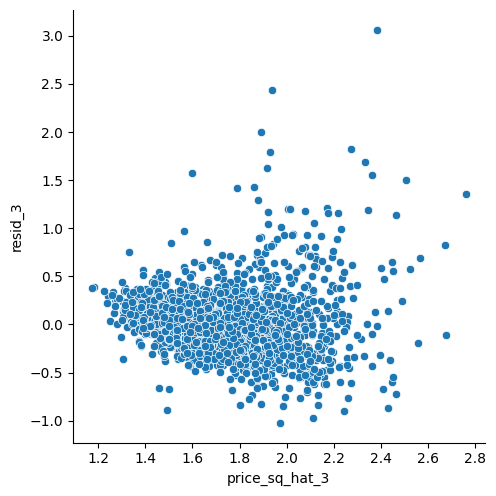

In [ ]:
# Сохраним прогнозные значения
d['price_sq_hat_3'] = model_3.predict()
# Сохраним остатки модели
d['resid_3'] = model_3.resid
# Построим график зависимости остатков модели от прогнозных значений
sns.pairplot(d, x_vars=['price_sq_hat_3'], y_vars=["resid_3"], height = 5)

Для моделей с зависимой переменной, измеренной в денежных единицах, бывает полезно рассмотреть модель с логарифмированным зависимым фактором.

**PE тест МакКиннона, Уайта и Дэвидсона (1983)**

Рассмотрим PE-тест для сравнения линейной и полулогарифмической моделей:

1) Оцениваем линейную и полулогарифмическую (или логарифмическую) модель регрессии:
    $$Y = X \beta + \varepsilon,$$
    $$\log Y = X \beta + \varepsilon.$$

2) Оценим вспомогательные регрессии $$Y = X \beta + \delta_{LIN} \left(\log \widehat{Y} - \widehat{\log Y} \right) + \varepsilon,$$
$$\log Y = X \beta + \delta_{LOG} \left(\widehat{Y} - \exp (\widehat{\log Y}) \right) + \varepsilon.$$

3) Проверим гипотезы $H_0$: $\delta_{LIN} = 0$ и $H_0'$: $\delta_{LOG} = 0$.

In [87]:
# PE-тест Дэвидсона-Маккинона (выбор между линейной и полулогарифмической (или линейной в логарифмах) моделями
d['ln_price_sq'] = np.log(d['price_sq'])
model_lin = smf.ols('price_sq ~ totsp + I(totsp**2) + livesp + kitsp + dist + I(dist**2)+ metrdist + brick', data = d).fit(cov_type='HC3')
model_log = smf.ols('ln_price_sq ~ totsp + I(totsp**2) + livesp + kitsp + dist + I(dist**2)+ metrdist + brick', data = d).fit(cov_type='HC3')

# Вспомогательные регрессии
d['lin'] = np.log(model_lin.fittedvalues) - model_log.fittedvalues
d['log'] = model_lin.fittedvalues - np.exp(model_log.fittedvalues)

model_lin_add = smf.ols('price_sq ~ totsp + I(totsp**2) + livesp + kitsp + dist + I(dist**2)+ metrdist + brick + lin', data = d).fit(cov_type='HC3')
model_log_add = smf.ols('ln_price_sq ~ totsp + I(totsp**2) + livesp + kitsp + dist + I(dist**2)+ metrdist + brick + log', data = d).fit(cov_type='HC3')

print(model_lin_add.summary())
print(model_log_add.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     125.2
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          2.17e-187
Time:                        19:44:53   Log-Likelihood:                -600.53
No. Observations:                2038   AIC:                             1221.
Df Residuals:                    2028   BIC:                             1277.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9132      0.131     14.597